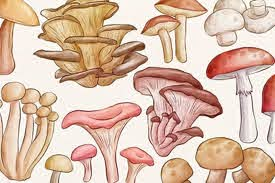


# The scenario

Poisonous mushrooms contain a variety of different toxins that can differ markedly in toxicity. Symptoms of mushroom poisoning may vary from gastric upset to organ failure resulting in death. 
this is the first step from my end to try to make a model that will atempt to classify as edible or not edible a mushroom based on its caracteristics.
the pourpouse is entirelly theorical and not recomended to base eating mushrooms decisions.  

# The Data Set
Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf
It Samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). 
Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. 
This latter class was combined with the poisonous one. 
The Guide clearly states that there is no simple rule for determining the edibility of a mushroom.
Please do not use for cooking at home with wild mushrooms . The objective is to evaluate the best model, thanks.


# Steps

We will load the database from,  
https://archive.ics.uci.edu/ml/datasets/mushroom. Then
Do data cleaning, exploratory data analysis, and 
feature engineering.

WE will be spliting the data
20/80
we will
Build a couple Classification models and select the one that seems
to have better preformance, thru evaluations methods.
Thanks and please forgive any typo.



In [ ]:
from time import time
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale  
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import svm
import itertools

In [ ]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',header=None)
df_raw = df_raw.sample(frac=1)
df_raw.columns = 	['target',	'cap-shape',	'cap-surface',	'cap-color',	'bruises',	'odor',	'gill-attachment',	'gill-spacing',
               'gill-size',	'gill-color', 'stalk-shape', 'stalk-root',	'stalk-surface-above-ring',	'stalk-surface-below-ring', 'stalk-color-above-ring',	
               'stalk-color-below-ring', 'veil_tipo',	'veil-color', 'ring-number',	'ring-type',	'spore-print-color',	'population',	'habitat']


In [ ]:
###EDA, looking for missing values, and understanding of the Classes per columns.

In [ ]:
df_raw.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil_tipo,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4972,p,x,f,y,f,f,f,c,b,p,e,b,k,k,b,n,p,w,o,l,h,y,p
6196,p,x,s,e,f,s,f,c,n,b,t,?,k,s,p,w,p,w,o,e,w,v,d
3980,p,f,y,g,f,f,f,c,b,p,e,b,k,k,b,n,p,w,o,l,h,v,g
813,p,x,y,w,t,p,f,c,n,w,e,e,s,s,w,w,p,w,o,p,n,v,g
4755,p,x,y,g,f,f,f,c,b,g,e,b,k,k,b,p,p,w,o,l,h,y,p


In [ ]:
"""... look there is a ? on column stalcj-root 7002, prob way moressss"""

'... look there is a ? on column stalcj-root 7002, prob way moressss'

In [ ]:
df_raw.info()

In [ ]:
total_missing = df_raw.isnull().sum().sort_values(ascending=False)
percent_missing = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
habitat,0,0.0
stalk-shape,0,0.0
cap-shape,0,0.0
cap-surface,0,0.0
cap-color,0,0.0
bruises,0,0.0
odor,0,0.0
gill-attachment,0,0.0
gill-spacing,0,0.0
gill-size,0,0.0


In [ ]:
# Categories in each feature x, just to have a little better understanding
column_list = df_raw.columns.values.tolist()
#print(column_list)
for column_name in column_list:
    print(column_name)
    print (len(df_raw[column_name].unique()),'classes')

target
2 classes
cap-shape
6 classes
cap-surface
4 classes
cap-color
10 classes
bruises
2 classes
odor
9 classes
gill-attachment
2 classes
gill-spacing
2 classes
gill-size
2 classes
gill-color
12 classes
stalk-shape
2 classes
stalk-root
5 classes
stalk-surface-above-ring
4 classes
stalk-surface-below-ring
4 classes
stalk-color-above-ring
9 classes
stalk-color-below-ring
9 classes
veil_tipo
1 classes
veil-color
4 classes
ring-number
3 classes
ring-type
5 classes
spore-print-color
9 classes
population
6 classes
habitat
7 classes


In [ ]:
"""veil_tipo
1 classes"" suspicious..."""

print(df_raw['veil_tipo'].unique())
print(len(df_raw['veil_tipo']))

In [ ]:
# we may drop 'veil_tipo' as may not be helpful, depending of corelation
#df_raw.drop('veil_tipo', axis=1)

Here, we are creating a panda df to have a little bit of a better clarification
of the classification per column.

In [ ]:
columnas_classes = {
'target': ['poisonous', 'eatable'], 
'cap-shape': ['bell', 'conical', 'convex','flat', 'knobbed','sunken'],
'cap-surface': ['fibrous', 'grooves', 'scaly','smooth'],
'cap-color': ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'],
'Bruises': ['bruises', 'no'],
'odor': ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'],
'gill-attachment': ['attached', 'descending', 'free', 'notched'],
'gill-spacing': ['close', 'rowded', 'distant'],
'gill-size': ['broad', 'narrow'],
'gill-color': ['black', 'brown', 'buff', 'chocolate','gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'],
'stalk-shape': ['enlarging', 'tapering'],
'stalk-root': ['bulbous', 'club', 'cup', 'equal', 'rhizomorphs', 'rooted', 'missing'],
'stalk-surface-above-ring': ['fibrous', 'scaly', 'silky', 'smooth'],
'stalk-surface-below-ring': ['fibrous', 'scaly', 'silky', 'smooth'],
'stalk-color-above-ring': ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'],
'stalk-color-below-ring': ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'],
'veil-color': ['brown', 'orange', 'white', 'yellow'],
'ring-number': ['none', 'one', 'two'],
'ring-tipo': ['cobwebby', 'evanescent', 'flaring', 'large', 'none', 'pendant', 'sheathing, zone'],
'spore-print-color': ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow'],
'population': ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'],
'habitat': ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'],
}

cclasses=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in columnas_classes.items() ]))
cclasses.head(7)

The figure, exemplifying how the relationship between not recommended to eat
and edible as the whole data set and folowed by the relationship of not recommended to eat and edible by columns, and class of the specific column





In [ ]:
colors = ('#ed872d','#800020')
palette = sns.set_palette(sns.color_palette(colors))

f, ax = plt.subplots(figsize=(15, 10))
labels = (('Not recommended for comsumption','Edible'))
df_raw['target'].value_counts().plot.pie(labels= labels, shadow= True, ax= ax, autopct='%1.1f%%', colors= colors,textprops={'fontsize': 12} )

ax.set_title('Mushroom Class Distribution', fontsize = 15);


features = df_raw.columns
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True) 
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = df_raw, hue = 'target', ax=axes[i], palette = 'CMRmap')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    axes[i].legend(loc=2, prop={'size': 20})
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')

In [ ]:
# encoding so we can manage the instances properly

labelencoder=LabelEncoder()
for col in df_raw.columns:
    df_raw[col] = labelencoder.fit_transform(df_raw[col])

df_raw.head()


Lets look into the correlation between the target variable and the rest of the columns


In [ ]:
np.abs(df_raw.corr().loc['target']).sort_values(ascending=False)

In [ ]:
### dropping 'veil_tipo' as may not be helpful, as coorelation was NaN
df = df_raw.drop('veil_tipo', axis=1)

Here showing the correlations.

In [ ]:
mush_coore = df.corr()

# a quick visual read on a big correlation matrix.

plt.figure(figsize=(28,15))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(mush_coore, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Mushroomsm Target, vs Columns)")

plt.show()

**FROM HERE ON WE WILL FOCUS ON STATISTICAL MODELS**

In [ ]:
df.columns

In [ ]:
#dividing samples and formating
# splitting in 2 parts
X = df.drop('target', axis='columns').copy()# the columns of data that we will use to make classification
y = df['target'].copy()# the column of the data that we want to predict

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
print(X.shape)
print(y.shape)

# FORMATING THE DATA FOR SVM    
the radial basis function(rbf) that we are using with our 
SVM Assumes that the data is centered and scaled.
COLUMNS SHOULD HAVE A MEAN VALUE OF 0
STANDARD DEVIATION OF 1
WE NEED TO DO THIS TO BOTH TESTING AND TRAINING DATA

# .NOTE.
WE SPLIT THE DATA INTO TESTING AND TRAINING DATA SET AND THEN
SCALE THEM SEPARATELY TO AVOID DATA LEAKAGE, DATA LEAKAGE OCCURS WHEN
INFORMATION ABOUT THE TRAINING DATA SET CORRUPTS THE TESTING DATA SET


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
np.unique(y)

# Building the preliminary Model


In [ ]:
# Create a classifier: a support vector classifier
# C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
# probability=False, tol=0.001, cache_size=200, class_weight=None, 
# verbose=False, max_iter=-1, decision_function_shape='ovr', 
# break_ties=False, random_state=None)

clf_svm = SVC(C=0.01, random_state=42)# support vector classifier, create a shell
clf_svm.fit(X_train_scaled, y_train)


In [ ]:
# Predicting the test set
y_pred = clf_svm.predict(X_test_scaled)

In [ ]:

ac = accuracy_score(y_test, y_pred)

print(ac)


Here we are trying to optimize the model adjusting hyperparameters to specifics to itself. We will use one tool called Grid Search, even though there is some other ways to do this, grid search its very friendly.

In [ ]:
param_grid= [
             {'C':[0.5, 1, 10, 100], ## C has to be mayor que cero
              'gamma': ['scale', 1, 0.1, 0.001, 0.0001],
              'kernel':['rbf']},
]
## we also using by default all the default values :)

optimal_params = GridSearchCV(
        SVC(), 
        param_grid, 
        cv=5, 
        scoring='accuracy', 
         #scoring='balance_accurancy' 
         #scoring='f1'
         #scoring='f1_micro'
         #scoring='f1_macro'
         #scoring='f1_weighted'
         #scorin='roc_auc'
         #...
         verbose=0 # set it to 2 to see whats up
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

Here the optimal Hyperparameters from the previous selection.
# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

and trying the optimal parameters in the SVC clf model

In [ ]:
clf_svm = SVC(random_state=42, C=0.25, gamma=0.1, kernel= 'rbf')# support vector classifier, create a shell
clf_svm.fit(X_train, y_train)


In [ ]:
clf_svm.score(X_test, y_test)

# Evaluation of model: Confusion matrix plot

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
##########################################################################################################
"""
NOT A GREAT IDEA TO USE PCA HERE NORMALLY WE USE it for dimensionalitty reduccion.

keep it in mind"""

In [ ]:
# Compute a PCA on the data set to reduce dimensionality

n_components = 5

print("Extracting the top %d Columns from %d the data frame"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
# a visual of the principal components
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labesl = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False, 
    labelbottom=False)
plt.ylabel('percentaje of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

In [ ]:
trainpc1 = X_train_pca[:, 0] # contains all cordenadas of X
trainpc2 = X_train_pca[:, 1] # y :)

pca_train_scaler = scale(np.column_stack((trainpc1, trainpc2)))

In [ ]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 1e4, 1e5],
              'gamma': [0.0001, 0.001, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [ ]:
###### new best after pca parameters for SVC

clf_svm = SVC(C=1000.0, 
              break_ties=False, 
              cache_size=200, 
              class_weight='balanced',
              coef0=0.0, 
              decision_function_shape='ovr', 
              degree=3, 
              gamma=0.001,
              kernel='rbf', 
              max_iter=-1, 
              probability=False, 
              random_state=None,
              shrinking=True, 
              tol=0.001, 
              verbose=False)
clf_svm.fit(X_train_pca, y_train)



In [ ]:

ac = accuracy_score(y_test, y_pred)
print(ac)

In [ ]:
##################################################################################################

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# defining the initial model
model = RandomForestClassifier(max_depth=2, random_state=42)
model.fit(X, y)


In [ ]:
model.score(X_test, y_test)

In [ ]:
### optimization

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)